# Loan Prediction Project

## 1. Dataset Information

In [91]:
import pandas as pd
import numpy as np

In [92]:
df = pd.read_csv('loan_prediction.csv')

In [93]:
for col in df.columns:
    counts = df[col].value_counts()
    print(f'df[{col}]')
    print(counts)
    print('\n')


df[Loan_ID]
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


df[Gender]
Male      489
Female    112
Name: Gender, dtype: int64


df[Married]
Yes    398
No     213
Name: Married, dtype: int64


df[Dependents]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


df[Education]
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


df[Self_Employed]
No     500
Yes     82
Name: Self_Employed, dtype: int64


df[ApplicantIncome]
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


df[CoapplicantIncome]
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64



From the result above, we can summary the dataset description:

1. **Loan_ID**: Unique Loan ID
2. **Gender**: Male/Female
3. **Married**: Applicant married (Y/N)
4. **Dependents**: Number of dependents
5. **Education**: Applicant Education (Graduate/Under Graduate)
6. **Self_Employed**: Self employed (Y/N)
7. **ApplicantIncome**: Applicant income
8. **CoapplicantIncome**: Coapplicant income
9. **LoanAmount**: Loan amount in thousands of dollars
10. **Loan_Amount_Term**: Term of loan in months
11. **Credit_History**: Credit history meets guidelines (Yes/No)
12. **Property_Area**: Urban/Semi Urban/Rural
13. **Loan_Status**: Loan approved (Y/N) (This is the target variable)

## 2. Handling Missing Values

#### Percentage of Missing Values in each column

In [94]:
df.isnull().sum() * 100 / len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Filling the missing values in columns with the mode

**Loan_ID Exclusion for Model Building:**
The `Loan_ID` column is not necessary for prediction, and retaining it may introduce the risk of data leakage. Therefore, it is advisable to exclude the `Loan_ID` column when constructing machine learning models.

In [95]:
df = df.drop('Loan_ID', axis=1)

The following columns: `Gender`, `Married`, `Dependents`, `Self_Employed`, `Loan_Amount_Term`, and `Credit_History`, contain missing rows that we intend to populate using the **mode of each respective column**. Additionally, the `LoanAmount` column exhibits missing rows, which we aim to complete using the **mean value of the column**.

In [96]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

## 3. Data Exploratory

We aim to delve into and analyze the visual representation of data through plots, utilizing the **seaborn** library to create various graphical representations.


#### Loan Amount Histogram

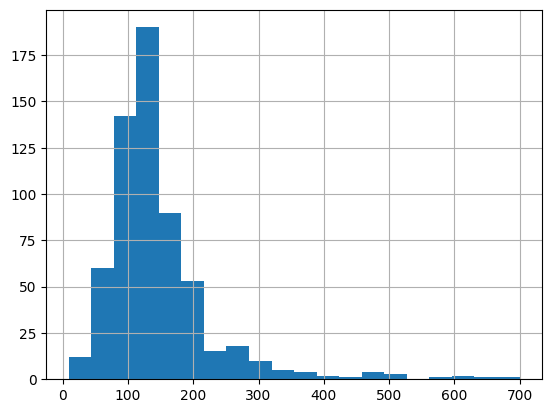

In [97]:
(df['LoanAmount']).hist(bins=20);

The distribution of loan amounts in the dataset can be summarized as follows: The most common loan amount is `$120.0`, occurring 20 times in the data. This is followed by `$110.0`, which appears 17 times, and `$100.0`, occurring 15 times. The distribution shows a range of loan values, with some values occurring only once, such as `$240.0`, `$214.0`, `$59.0`, `$166.0`, and `$253.0`. Overall, there are 203 unique loan amounts in the dataset.


#### Applicant Income Histogram

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


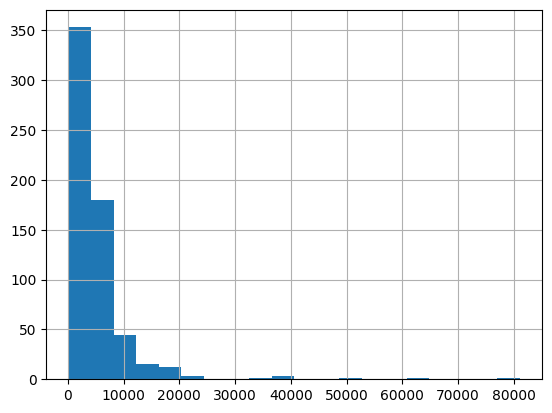

In [98]:
print(df['ApplicantIncome'].value_counts())
(df['ApplicantIncome']).hist(bins=20);

The distribution of Applicant Income in the column `df[ApplicantIncome]` varies across a range of values. The majority of applicants have an income around `$2,500`, with 9 instances, followed closely by `$4,583` and `$6,000`, each occurring 6 times. These values represent the most common income levels among applicants. As the income values increase, the frequency decreases, indicating that fewer applicants have higher incomes. This distribution provides insights into the income levels of applicants seeking loans.

##### Coapplicant Income

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


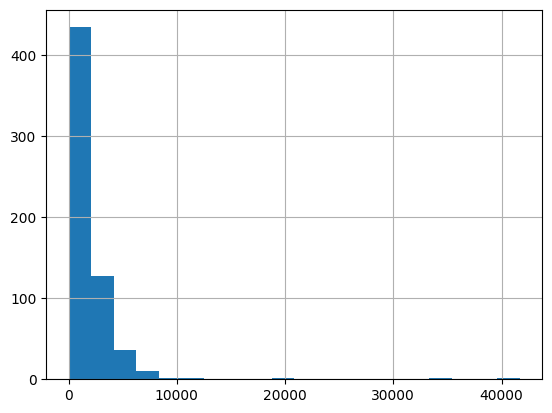

In [99]:
print(df['CoapplicantIncome'].value_counts())
(df['CoapplicantIncome']).hist(bins=20);

The distribution of coapplicant income in the dataset varies across a range of values. The most common coapplicant income is `$0.0` (having no income), occurring 273 times in the dataset. There are several other values, such as `$2500.0`, `$2083`.0,` $1666.0`, and so on, each appearing 5 times. These observations suggest that a significant portion of coapplicants have no income, while other values are relatively evenly distributed. Overall, there are 287 unique values in the "CoapplicantIncome" column.


#### Countplot of Gender

Male      502
Female    112
Name: Gender, dtype: int64


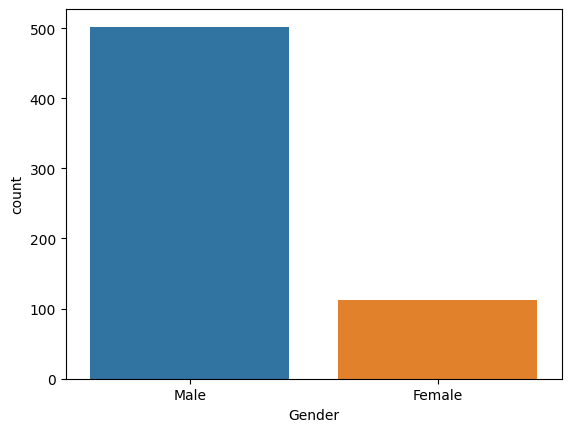

In [100]:
import seaborn as sns
print(df['Gender'].value_counts())
sns.countplot(data=df, x='Gender');

The distribution of gender, as seen in the DataFrame (`df`), is summarized as follows: Among the applicants, 489 are male, while 112 are female, with the "Gender" column serving as the identifier for these categories.


#### Countplot of Married People

Yes    401
No     213
Name: Married, dtype: int64


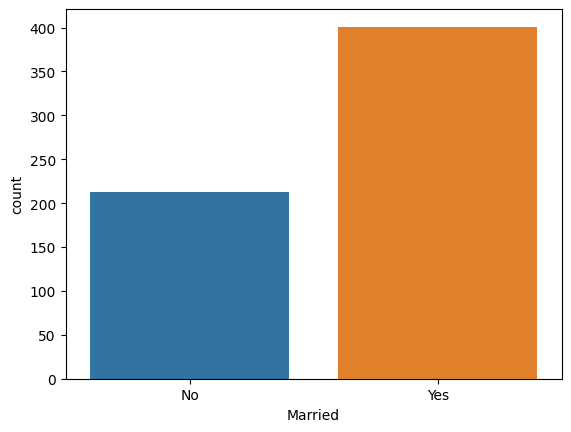

In [101]:
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df);

The distribution of marital status in the dataset can be summarized as follows: there are 398 individuals marked as "Married" and 213 individuals marked as "Not Married" (i.e., "No") in the "Married" column of the DataFrame.


#### Countplot of Dependents

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


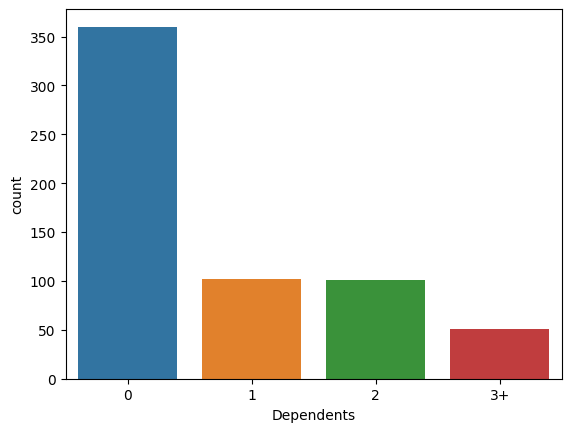

In [102]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df);

The distribution of Dependents varies across different levels of dependents in the dataset. The majority of applicants have no dependents, with a total of 345 instances falling into this category. For those with one dependent, there are 102 cases, while households with two dependents have 101 instances. Finally, applicants with three or more dependents constitute the smallest group, with a count of 51. This breakdown provides valuable insights into how coapplicant income is distributed among applicants based on their dependent status.


#### Countplot of Property Area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


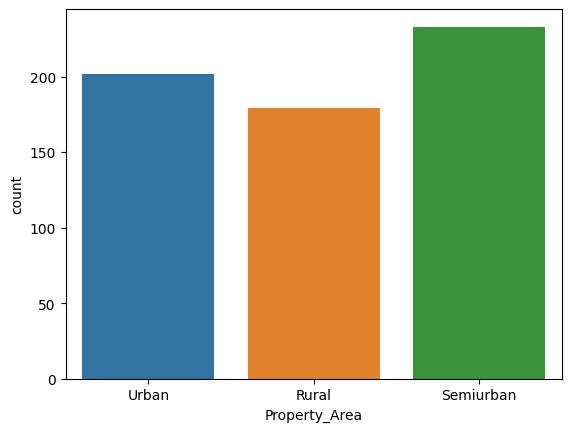

In [103]:
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area', data=df);

The distribution of property areas in the DataFrame (`df`) can be summarized as follows: There are 233 properties located in Semiurban areas, 202 in Urban areas, and 179 in Rural areas. This breakdown provides insights into the distribution of properties across different types of areas, which can be valuable for various analytical purposes.


##  4. Label Encoding

#### Mapping to Numerical Values

While some machine learning models may not accommodate categorical values, addressing this limitation often involves employing **Label Encoding**, a conveniently available process through the **sklearn** module. However, it's worth noting that Label Encoding from the sklearn module lacks the flexibility to control the meaning of the assigned parameters. For instance, in the 'Property_Area' column, one might desire `rural=0`, `semiurban=1`, and `urban=2`, but Label Encoding may produce `rural=2`, `semiurban=1`, and `urban=0`. To achieve precise mapping, utilizing the **`map`** function proves to be a more suitable alternative.


In [104]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}).astype('int')
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

#### Changing Categorical Entries to Numerical Entries

In [107]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

It's important to note that the data type for the entry `3+` in the `Dependents` column is not an integer, which could pose challenges for certain machine learning models. Therefore, it is advisable to convert this entry to an integer value, specifically denoted as `4`.


In [108]:
df['Dependents'] = df['Dependents'].replace(to_replace='3+', value='4')

## 8. Save the feature columns as vector X and the target column as vector y.

This would simplify the process of using `train_test_split` to construct the machine learning model.

In [111]:
X, y = df.drop('Loan_Status', axis=1), df['Loan_Status']

## 9. Feature Scaling

#### Standardizing Entries that have big values

In [113]:
X.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
15,1,0,0,1,0,4950,0.0,125.0,360.0,1.0,2
521,1,0,0,1,0,2500,0.0,55.0,360.0,1.0,1
25,1,1,0,1,1,9560,0.0,191.0,360.0,1.0,1
553,1,1,0,0,0,2454,2333.0,181.0,360.0,0.0,2
88,1,0,0,1,0,8566,0.0,210.0,360.0,1.0,2


Kindly keep in mind that the values in the columns `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, and `Loan_Amount_Term` display notable deviations from the rest of the columns. To mitigate any potential bias within the Machine Learning Model, it is crucial to standardize these values. This standardization process can be effectively accomplished by employing the `StandardScaler` object from the `sklearn` module.


In [114]:
from sklearn.preprocessing import StandardScaler

cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X[cols] = StandardScaler().fit_transform(X[cols])


## 10. Dividing the dataset into a training set and a test set and then applying K-Fold Cross Validation.


We are in the process of creating a universal function that can be used with all machine learning models.

In [157]:
from sklearn.model_selection import train_test_split, cross_val_score

model_df = {}
def model_evaluation(model, train_data = X, test_data = y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model.fit(X_train, y_train)
    print(f"The accuracy of the {model} model is {model.score(X_test, y_test)}")
    print(f"The average cross-validation score for the {model} model is {np.mean(cross_val_score(model, X, y))}")
    model_df[model] = round(np.mean(cross_val_score(model, X, y)) * 100, 2)

## 11. Logistic Regression

We are tasked with predicting the `loan_status` column, which represents binary outcomes for loan approval (Y) or rejection (N). To address this binary classification problem, we have chosen to utilize logistic regression from the `sklearn.linear_model` module. This choice is based on several key factors:

1. **Binary Classification**: Logistic regression is specifically tailored for binary classification tasks, which aligns perfectly with our problem where `loan_status` has two distinct classes (Y and N).

2. **Probability Estimation**: Logistic regression models provide probability estimates, allowing us to assess the likelihood of loan approval (Y) or rejection (N) for each applicant, a critical aspect of our task.

3. **Interpretability**: Logistic regression results are highly interpretable, enabling us to understand the impact of each feature on the likelihood of loan approval. This interpretability is valuable for explaining model predictions to stakeholders.

4. **Low Complexity**: Logistic regression offers a straightforward and computationally efficient approach compared to more complex algorithms, making it both effective and accessible for our predictive task.

Considering these factors, logistic regression is a well-suited choice for our objective of predicting loan approval outcomes and classifying applicants into the categories of approved (Y) or not approved (N).


In [158]:
from sklearn.linear_model import LogisticRegression
model_evaluation(LogisticRegression(), X, y)

The accuracy of the LogisticRegression() model is 0.8536585365853658
The average cross-validation score for the LogisticRegression() model is 0.8045715047314408


## 12. Support Vector Classifier

We are going to use Support Vector Classification (SVC) from the `sklearn` module to predict the `loan_status`, which is a binary column, from the dataset. The choice of SVC for this task is based on the nature of the problem and the characteristics of the dataset.

1. **Binary Classification**: Since the task involves predicting whether a loan status is 'Y' (approved) or 'N' (not approved), it is essentially a binary classification problem. SVC is well-suited for binary classification tasks as it aims to find a decision boundary that maximizes the margin between the two classes.

2. **Non-Linear Separability**: In some cases, the decision boundary between classes might not be linear. SVC has the capability to handle non-linear boundaries by using different kernel functions (e.g., radial basis function kernel) to transform the data into a higher-dimensional space where the classes become separable.

3. **Robust to Outliers**: SVC is robust to outliers, which can be important in a dataset like this, where there might be extreme values or data points that deviate from the majority.

4. **Effective in High-Dimensional Spaces**: If the dataset has many features, SVC can still perform well. It's effective in high-dimensional spaces, making it suitable for datasets with multiple features like 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'.

In summary, SVC is a suitable choice for the task of predicting 'loan_status' because it can handle binary classification, adapt to non-linear boundaries, deal with outliers, and perform effectively in high-dimensional feature spaces.


In [159]:
from sklearn import svm
model_evaluation(svm.SVC(kernel='rbf'), X, y)

The accuracy of the SVC() model is 0.7804878048780488
The average cross-validation score for the SVC() model is 0.7964147674263627


## 13. Decision Tree Classifier

Our task revolves around predicting the `loan_status` column, which represents whether a loan application was approved (Y) or not (N) based on the dataset provided. To address this binary classification challenge, we have opted to employ the Decision Tree Classifier from the `sklearn.tree` module. Here's an explanation of why Decision Tree Classifier is a suitable choice:

1. **Binary Classification**: Decision trees are inherently capable of handling binary classification tasks, aligning perfectly with our objective where the `loan_status` column has two distinct classes (Y and N) representing loan approval outcomes.

2. **Interpretability**: Decision trees provide results that are easy to interpret. The tree structure reflects a sequence of decisions based on input features, enabling us to grasp the factors influencing loan approval decisions. This interpretability is especially valuable in scenarios where transparency is essential.

3. **Feature Importance**: Decision trees naturally calculate feature importance, assisting us in identifying which features wield the most substantial influence on loan approval. This insight guides our understanding of the key factors impacting the outcome.

4. **Non-linearity Handling**: Decision trees can effectively capture non-linear relationships between features and the target variable. This capability is vital for modeling complex decision boundaries that may exist in loan approval processes.

5. **Flexibility**: Decision trees can be fine-tuned to control their depth and complexity. This flexibility allows us to strike a balance between model performance and mitigating overfitting, ensuring robust generalization to new data.

6. **Ensemble Learning**: Decision trees can also be integrated into ensemble methods like Random Forests or Gradient Boosting, which frequently enhance prediction accuracy and model robustness.

Taking these aspects into account, the Decision Tree Classifier emerges as a fitting choice for our binary classification problem of predicting loan approval outcomes (Y or N). It offers interpretability, facilitates feature importance analysis, and accommodates non-linear relationships in the data.


In [160]:
from sklearn.tree import DecisionTreeClassifier
model_evaluation(DecisionTreeClassifier(), X, y)

The accuracy of the DecisionTreeClassifier() model is 0.6829268292682927
The average cross-validation score for the DecisionTreeClassifier() model is 0.7133813141410104


## 14. Gradient Boosting Classifier

For the prediction of the `loan_status` column, representing binary loan approval outcomes (Y or N), we have opted for the Gradient Boosting Classifier from the `sklearn.ensemble` module. Below, we elucidate why the Gradient Boosting Classifier is a fitting choice:

1. **Ensemble Learning**:
   - *Advantages*: Gradient Boosting, an ensemble learning technique, amalgamates multiple weaker models (typically decision trees) sequentially to enhance predictive accuracy. It effectively corrects the errors of preceding models, resulting in superior performance.
   - *Considerations*: Its ability to capture intricate data patterns sets it apart from individual models.

2. **Robustness**:
   - *Advantages*: Gradient Boosting is resilient to outliers and noisy data. It accommodates various data types, including numerical and categorical features, rendering it adaptable to real-world datasets.
   - *Considerations*: Vigilance against overfitting is necessary, necessitating parameter tuning for optimal results.

3. **Feature Importance**:
   - *Advantages*: Gradient Boosting furnishes feature importance scores, facilitating the identification of pivotal features influencing loan approval decisions. This aids in comprehending the determinants of outcomes.
   - *Considerations*: It streamlines feature selection and informs data preprocessing endeavors.

4. **Predictive Power**:
   - *Advantages*: Gradient Boosting tends to deliver high predictive accuracy, a critical aspect in tasks like loan approval, where correctly assessing applicants' eligibility is of utmost importance.
   - *Considerations*: It excels in handling imbalanced datasets, making it suitable for scenarios with uneven class distributions.

5. **Flexibility**:
   - *Advantages*: Gradient Boosting allows for meticulous hyperparameter tuning, enabling the optimization of model performance tailored to our specific task.
   - *Considerations*: Parameter tuning may entail some computational resources but is indispensable for achieving peak performance.

6. **Interpretability**:
   - *Considerations*: While Gradient Boosting provides insights into feature importance, its interpretability may be slightly lower compared to simpler models like logistic regression.

Considering these attributes, the Gradient Boosting Classifier emerges as a robust contender for predicting loan approval outcomes. Its ensemble nature, resilience, aptitude for capturing intricate relationships, and feature importance analysis align seamlessly with the demands of this binary classification task.


In [161]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = GradientBoostingClassifier().fit(X_train, y_train)
model_evaluation(GradientBoostingClassifier(), X, y)

The accuracy of the GradientBoostingClassifier() model is 0.7723577235772358
The average cross-validation score for the GradientBoostingClassifier() model is 0.7784886045581768


#### Analyzing The Features Importance

In [149]:
feature_imp = dict(zip(clf.feature_names_in_, clf.feature_importances_))
feature_imp = {k: v for k,v in sorted(feature_imp.items(), key = lambda x:x[1], reverse=True)}
feature_imp

{'Credit_History': 0.38792505774796615,
 'ApplicantIncome': 0.23985943994908085,
 'LoanAmount': 0.1733795397901463,
 'CoapplicantIncome': 0.1130300041415762,
 'Loan_Amount_Term': 0.025064253010718747,
 'Property_Area': 0.02052473749821235,
 'Education': 0.01358987565877404,
 'Married': 0.012135131235704743,
 'Dependents': 0.01155673288696885,
 'Self_Employed': 0.002902933066350774,
 'Gender': 3.229501450091258e-05}

Here is a summary analysis of feature importance based on the Gradient Boosting Decision Tree Model:

- **Credit_History (38.79%)**: The most influential feature in predicting loan approval status is "Credit_History." It carries the highest weight, indicating that an applicant's credit history has a significant impact on whether their loan application will be approved.

- **ApplicantIncome (23.99%)**: "ApplicantIncome" is the second most important feature. This suggests that the income level of the applicant plays a substantial role in the loan approval decision.

- **LoanAmount (17.34%)**: "LoanAmount" is also a significant feature, indicating that the requested loan amount contributes significantly to the prediction of loan approval.

- **CoapplicantIncome (11.30%)**: The income of the coapplicant is another relevant factor, although it is slightly less important than the applicant's income.

- **Loan_Amount_Term (2.51%)**: The term of the loan ("Loan_Amount_Term") has a relatively minor impact on the loan approval decision compared to other features.

- **Property_Area (2.05%)**: The location of the property ("Property_Area") also has a minor influence on loan approval.

- **Education (1.36%)**: The educational background of the applicant ("Education") has a small but noticeable effect on the prediction.

- **Married (1.21%)**: The marital status of the applicant ("Married") contributes slightly to the model's predictions.

- **Dependents (1.16%)**: The number of dependents ("Dependents") is another feature that has a marginal impact on loan approval.

- **Self_Employed (0.29%)**: Whether the applicant is self-employed ("Self_Employed") has a minimal influence on the model's predictions.

- **Gender (0.00%)**: "Gender" is the least important feature, suggesting that it has almost no impact on the prediction of loan approval.

In summary, the most critical factors affecting loan approval are the applicant's credit history, income (both applicant and coapplicant), and the requested loan amount. These variables are considerably more influential than other factors such as loan term, property area, education, marital status, number of dependents, self-employment status, and gender. This information can guide decision-makers and help prioritize which features to focus on when assessing loan applications.

## 15. Random Tree Classifier

Our task revolves around predicting the `loan_status` column, which signifies loan approval outcomes (Y or N) based on the provided dataset. To address this binary classification challenge, we have selected the Random Forest Classifier from the `sklearn.ensemble` module. Here's an explanation of why the Random Forest Classifier is a fitting choice:

1. **Ensemble Learning**: Random Forest is an ensemble learning technique that combines multiple decision trees to enhance predictive accuracy and reduce the risk of overfitting. It harnesses the collective wisdom of multiple trees.

2. **Robustness**: Random Forests exhibit resilience to overfitting, thanks to their ensemble nature. By aggregating predictions from multiple trees, they tend to generalize well to new, unseen data, making them a robust choice for classification tasks.

3. **Feature Importance**: Random Forests calculate feature importance, offering insights into the features that exert the most substantial influence on loan approval decisions. This information is invaluable for comprehending the key factors driving the outcomes.

4. **Non-linearity Handling**: Random Forests can effectively capture non-linear relationships between features and the target variable, a crucial capability for modeling complex decision boundaries that may exist in loan approval processes.

5. **Reduced Variance**: They mitigate the variance issues often associated with single decision trees, resulting in increased stability and reliability during predictions.

6. **Handling Missing Values**: Random Forests can gracefully handle missing values in the dataset without the need for extensive data imputation, simplifying the data preprocessing pipeline.

7. **Flexibility**: They offer flexibility in hyperparameter tuning, enabling us to fine-tune model performance according to specific requirements.

8. **Parallelization**: Random Forests can be parallelized, making them well-suited for efficiently handling large datasets.

Considering these aspects, the Random Forest Classifier stands out as a well-suited choice for our binary classification problem of predicting loan approval outcomes (Y or N). It promises improved accuracy, robustness, interpretability through feature importance analysis, and the ability to model non-linear relationships in the data.


In [162]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)
model_evaluation(RandomForestClassifier(), X, y)

The accuracy of the RandomForestClassifier() model is 0.7967479674796748
The average cross-validation score for the RandomForestClassifier() model is 0.7834066373450619


#### Analyzing The Feature Importance

In [145]:
feature_imp = dict(zip(clf.feature_names_in_, clf.feature_importances_))
feature_imp = {k: v for k,v in sorted(feature_imp.items(), key = lambda x: x[1], reverse=True)}
feature_imp

{'Credit_History': 0.2656112007962421,
 'ApplicantIncome': 0.21205330923882804,
 'LoanAmount': 0.1788106892969859,
 'CoapplicantIncome': 0.11051792898545215,
 'Loan_Amount_Term': 0.05071574201710987,
 'Property_Area': 0.04779461976279416,
 'Dependents': 0.047117472920864524,
 'Married': 0.028515989927750004,
 'Education': 0.020860133123977196,
 'Self_Employed': 0.0199838135254959,
 'Gender': 0.018019100404500027}

Here is a summary analysis of the feature importance from the Random Forest model:

1. **Credit_History (26.56%)**: The credit history of applicants is the most important feature in predicting loan status, contributing significantly to the model's decision-making process.

2. **ApplicantIncome (21.21%)**: The applicant's income is the second most important feature, indicating that higher income applicants are more likely to have their loans approved.

3. **LoanAmount (17.88%)**: The loan amount requested by applicants also plays a crucial role, with higher loan amounts potentially leading to lower approval rates.

4. **CoapplicantIncome (11.05%)**: The income of the coapplicant has a moderate influence on loan status, suggesting that joint applications can impact the approval decision.

5. **Loan_Amount_Term (5.07%)**: The term of the loan has some importance, indicating that the duration of the loan can affect the likelihood of approval.

6. **Property_Area (4.78%)**: The property area is a relevant factor, with certain areas having a higher likelihood of loan approval than others.

7. **Dependents (4.71%)**: The number of dependents also contributes to the decision, suggesting that applicants with more dependents may face different approval rates.

8. **Married (2.85%)**: Marital status has a small but non-negligible impact on loan approval, with married applicants potentially having a different likelihood of approval than unmarried ones.

9. **Education (2.09%)**: The educational background of applicants is a minor factor in the model's decision, indicating that graduates and non-graduates may experience different approval rates.

10. **Self_Employed (1.99%)**: The employment status as self-employed or not has a minimal influence on loan approval, with a slightly higher importance.

11. **Gender (1.80%)**: Gender has the lowest importance among the features, suggesting that it has a very limited impact on the loan approval decision.

These insights into feature importance can help you understand which factors are most influential in predicting loan status. It's important to note that these percentages represent the relative importance of each feature in the model, and the actual impact of each feature may vary depending on the dataset and specific context.

## 16. Hyperparameter Tuning

In [164]:
model_df

{LogisticRegression(): 80.46,
 SVC(): 79.64,
 DecisionTreeClassifier(): 72.32,
 GradientBoostingClassifier(): 77.85,
 RandomForestClassifier(): 78.66}

Based on the evaluation of various machine learning models, the performance scores are as follows:

- **Logistic Regression**: 80.46%
- **Support Vector Classifier (SVC)**: 79.64%
- **Decision Tree Classifier**: 72.32%
- **Gradient Boosting Classifier**: 77.85%
- **Random Forest Classifier**: 78.66%

After careful evaluation, it is evident that the **Logistic Regression** model outperforms the other models with the highest accuracy score of 80.46%. Therefore, we have selected **Logistic Regression** as the best machine learning model for predicting loan status in this dataset.

Hence, we will employ `GridSearchCV` for hyperparameter tuning on the Logistic Regression model.

In [183]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga'],  # Solver algorithm
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data and perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best accuracy score
best_accuracy = grid_search.best_score_
print("Best Accuracy Score:", best_accuracy)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Score: 0.824860853432282


After performing hyperparameter tuning for the Logistic Regression model, the best hyperparameters and corresponding accuracy score are as follows:

- **Best Hyperparameters**:
  - `C`: 0.01
  - `penalty`: 'l1'
  - `solver`: 'liblinear'

- **Best Accuracy Score**: 82.49%

These hyperparameters were determined through the grid search process using cross-validation, resulting in an improved accuracy score of 82.49% for the Logistic Regression model.

## 17. Predicting New Data Using The Best Model

We will employ the best-performing model, Logistic Regression, with the following hyperparameters: `C: 0.01`, `penalty: 'l1'`, `solver: 'liblinear'`, and `max_iter: 1000`, to make predictions on new data.

#### Saving The Best Model

We are going to store the model in a binary format so that you can easily load it later for making predictions without the need to retrain the model. It is commonly used in machine learning to persist trained models.

In [228]:
import joblib

logistic_regression = LogisticRegression(C = 0.01,
                                        penalty = 'l1',
                                        solver = 'liblinear',
                                        max_iter = 1000)
logistic_regression.fit(X_train, y_train)
joblib.dump(logistic_regression,'loan_status_predict')
best_model = joblib.load('loan_status_predict')

#### Predicting using The Best Model

Suppose there is an individual who:

The individual is male (`Gender: Male`), married (`Married: Yes`), has two dependents (`Dependents: 2`), holds a graduate degree (`Education: Graduate`), is not self-employed (`Self_Employed: No`), has an applicant income of 2889, no coapplicant income (`CoapplicantIncome: 0.0`), is applying for a loan amount of 45, with a loan term of 180 months (`Loan_Amount_Term: 180`), has no credit history (`Credit_History: 0`), and resides in a semiurban area (`Property_Area: Semiurban`).

Translating this using the label encoding, we want to predict:

In [230]:
new_df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])
result = best_model.predict(new_df)
if result == 0:
    print("Loan is not approved")
else:
    print("Loan is approved")

Loan is not approved


Therefore, based on the best model, **the loan is not approved** for this specific person, with an accuracy of 82.49%.

## 18. Application-based Machine Learning Model

We're creating an application based on this machine learning model. You can input any values into the application, click the button, and within seconds, you'll receive the loan status determined by the best machine learning model, boasting an accuracy of 82.49%.

In [234]:
from tkinter import *
import joblib
import pandas as pd
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education ['Graduate':1,'Not Graduate':0]").grid(row=4)
Label(master,text = "Self_Employed ['Yes':1,'No':0]").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History [Credit history meets guidelines ('Yes': 1, 'No': 0)]").grid(row=10)
Label(master,text = "Property_Area ['Rural':0,'Semiurban':1,'Urban':2]").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()